# Getting started with NumPy
Prepared by: Gregory J. Bott, Ph.D. 

This notebook provides an introduction to the `numpy` package. The content borrows heavily from multiple sources:
* (one of our textbooks) The book *Data Science Handbook*, which was written by Jake VanderPlas available at https://jakevdp.github.io/PythonDataScienceHandbook/ (accessed 12/17/2019).
* Content from Dr. Nick Freeman (https://github.com/nkfreeman/Python_Tutorials)
* SciPy 2018 Conference session: Intro to Numerical Computing with NumPy by Alex Chabot-Leclerc (https://www.youtube.com/watch?v=V0D2mhVt7NE&list=PL2fyLI4jtOlCvb6QchwsZ0xm51PP5G0wf&index=17&t=147s)

NumPy (short for <em>**Num**erical **Py**thon</em>) provides efficient storage and manipulation of numerical arrays, which makes NumPy an integral package for scientific computing. Its origins can be traced back to two other specialized packages for calculating arrays: Numeric and Numarray. The Numpy library, first released in 2006 (1.0 version) is the unification of these two libraries. It is highly efficient handling multidimensional and large arrays and offers a large number of functions to manipulate arrays and perform mathematical calculations.

## Installing the TOC extension
This notebook is best viewed using Jupyter Lab with the JupyterLab-TOC extension for navigation. 

1. Right-click the Anaconda prompt icon and then click Run as Administrator.
2. In the console window, type the following commands:
  * conda udpate conda
  * conda install nodejs
  * pip install npm
  * jupyter labextension install @jupyterlab/toc
3. Then to start Jupyter Lab, type:
  * jupyter lab --watch
   
  (Source: https://github.com/jupyterlab/jupyterlab-toc)

## The NumPy package
NumPy is a foundational Python library written using Python and C that provides fast, efficient support for multi-dimensional arrays, mathemetical functions, slicing and selection capabilities, and broadcasting functions. It is available as a standalone . part of the Anaconda distribution. 

To determine whether the library has already been installed, run one of the following commands in the shell:

* conda list
* pip list

..or via Magic command within a Jupyter notebook:
 
 ```python
%conda list
```

In [1]:
%conda list

# packages in environment at C:\Users\gregb\Anaconda3:
#
# Name                    Version                   Build  Channel
anaconda-client           1.7.2                    py37_0  
anaconda-navigator        1.9.7                    py37_0  
asn1crypto                0.24.0                   py37_0  
attrs                     19.1.0                   py37_1  
backcall                  0.1.0                    py37_0  
backports                 1.0                        py_2  
backports.functools_lru_cache 1.5                        py_2  
backports.tempfile        1.0                        py_1  
backports.weakref         1.0.post1                  py_1  
beautifulsoup4            4.8.0                    py37_0  
blas                      1.0                         mkl  
bleach                    3.1.0                    py37_0  
bzip2                     1.0.8                he774522_0  
ca-certificates           2019.8.28                     0  
certifi                   2019.9

In [2]:
import numpy as np
np.version.version

'1.16.5'

## Installing NumPy
If numpy is not installed use either of the following to install the library:
```python
conda install numpy
pip install numpy
```
Then import the library. Although you can use a different variable, by convention, NumPy is imported as 'np'.
```python
import numpy as np
```

## Importing NumPy

If numpy is not installed use either of the following to install the library:
```python
conda install numpy
pip install numpy
```

Users can import available packages and modules using Python's `import` statement. Two forms of import expressions are commonly used.
1. The first common import expression takes the form **import mypackage as mp**. This statement imports a package named *mypackage*, and assigns it to the alias *mp*. Suppose that *mypackage* contains the definition for a function named *myfunction*. If this were true, we would call *myfunction* using the syntax `mp.myfunction(*args)`, where `*args` is a placeholder for any function arguments.<br>

2. The second common import expression takes the form **from mypackage import mysubmodule**. This statement imports a specific submodule from a package named *mypackage*. Since there is no alias, this type of import will bring in the functions specified in the submodule as they are writtin. For example, if the submodule *mysubmodule* includes a function called *myfunction*, we would call *myfunction* using the syntax `myfunction(*args)`, where `*args` is a placeholder for any function arguments.

<div class="alert alert-block alert-danger">
    <b>Name conflicts with <i>from - import</i> approach:</b> When using the <i>from - import</i> approach sepcified in bullet 2, it is important to make sure that method names in package or module you are importing do not conflict with names defined in the importing code. For example, if we import a submodule named *mysubmodule* that includes a function called *myfunction*, but we also have a function named *myfunction* in the importing code, there will be a naming conflict.
</div>

The following code block uses the *import - as* approach to import NumPy. The alias *np* is a standard convention.

In [3]:
import numpy as np

# Why use NumPy?
Before we look at specific details of the NumPy package, it is important to understand its motivation. NumPy was developed to support scientific computations via the efficient implementation of a multi-dimensional array. In addition to an efficient array implementation, NumPy also includes functions for performing operations on NumPy arrays that are optimized for computational efficeincy. The following code block illustrate the substantial increase in efficiency that NumPy provides in comparison to a standard Python list. Specifically, the example considers the task of adding two vectors of a specified size using both standard Python lists and NumPy arrays. The time of the addition, and the size of the resulting objects are reported for comparison purposes.

> <div class="alert alert-block alert-info">
    <b>The <i>del()</i> function:</b> The <i>del()</i> function is a Python method that deletes a created object from memory. For example, <i>del(my_var)</i> deletes a Python variable named <i>my_var</i>, freeing any computer memory that was being used to store the variable. The <i>del(my_var)</i> can take multiple arguments. For example, <i>del(my_var1, my_var2)</i> deletes the Python variables named <i>my_var1</i> and <i>my_var2</i>. If you pass an argument to <i>del(my_var)</i> that does not correspond to an existing Python object, an error will be raised.
</div>

>The **np.arange()** function is an array creation routine that creates an instance of an ndarray with evenly spaced values. It takes the form:
```Python
numpy.arange([start, ]stop, [step, ], dtype=None)
```

In [4]:
import time
import sys
import matplotlib.pyplot as plt
 
# 10 Million
SIZE = 10000000

list1 = range(SIZE)
list2 = range(SIZE)

start = time.time()

#Loop through every item in the array and 'zip' them together
result = [(x+y) for x,y in zip(list1,list2)]
list_time = (time.time() - start)*1000
#print("Using Python lists, the addition took",(time.time() - start)*1000,"milliseconds.")
print(f"Using Python lists, the addition took {list_time:.0f} milliseconds.")
print("The size of the result object based on Python lists is",sys.getsizeof(result),"bytes.\n")

del(list1, list2, result)

nparray1 = np.arange(SIZE)
nparray2 = np.arange(SIZE)
start = time.time()

# No need to loop through every item using NumPy. Simply use the '+' operator.
result = nparray1 + nparray2
array_time = (time.time() - start)*1000
print(f"Using NumPy arrays, the addition took {array_time:.0f} milliseconds.")
#print("Using NumPy arrays, the addition took",(time.time() - start)*1000,"milliseconds.")
print("The size of the result object based on NumPy arrays is",sys.getsizeof(result),"bytes.\n")

del(nparray1, nparray2, result)

objects = ('ndarray', 'list')
y_pos = np.arange(len(objects))
performance = [array_time, list_time]

plt.barh(y_pos, performance, align='center', alpha=.9, height=.6)
plt.yticks(y_pos, objects)
plt.xlabel('milliseconds')
plt.title('Speed (shorter is faster)')

plt.show()

ModuleNotFoundError: No module named 'matplotlib'

In addition to demonstrating the substantial performance gains offered by NumPy, the previous code block also illsutrates some of the subtle differences of working with Python lists versus NumPy arrays.

- The `time.time()` function, from the `time` module, returns the current system time. Saving the value of the current time in a variable `start` and then computing the difference `time.time() - start` returns the seconds elapsing between the two calls to `time.time()` in seconds. Multiplying by 1000 converts the elapsed time to milliseconds. Another option capture the elapsed time for a line of code within an IPython notebook is to use the magic command `%timeit`.


- When working with Python lists, the `range()` function returns a sequence of integers starting at zero and ending at the argument passed to `range()`. In our example, we pass a variable `SIZE` to the `range()` function. Thus, the sequence stored in the list is 0, 1, ..., `SIZE`-2, `SIZE`-1.


- When working with NumPy arrays, the `np.arange()` function returns a sequence of integers starting at zero and ending at the argument passed to `np.arange()`. In our example, we pass a variable `SIZE` to the `np.arange()` function. Thus, the sequence stored in the NumPy array is 0, 1, ..., `SIZE`-2, `SIZE`-1.


- The `sys.getsizeof()` function, from the `sys` library, returns the size of an object in bytes.


- When working with Python lists, the `zip()` function essentially combines two or more list objects (like zipping up a jacket) and allows element-wise operations to be performed.


- When working with NumPy arrays, there is no need to *zip* arrays. Instead, element-wise operations are performed using standard mathematical operators.

### Jupyter's timeit Magic Command
<div class="alert alert-block alert-info">
    <b>Jupyter's <i>timeit</i> magic command:</b> Another approach for timing operations that is <b>specific to Jupyter notebooks</b> is the <i>timeit</i> magic command. This command can be used with syntax that follows the form <b>%timeit [-n &lt;N&gt; -r &lt;R&gt; [-t|-c] -q -p &lt;P&gt; -o]</b>, where

<li> -n &lt;N&gt;: specifies to execute the given statement &lt;N&gt; times in a loop. If <N> is not provided, <N> is determined so as to get sufficient accuracy.</li>

<li> -r &lt;R&gt;: specifies the number of repeats &lt;R&gt;, each consisting of &lt;N&gt; loops, and take the best result. Default: 7</li>

<li> -t: specifies to use time.time to measure the time, which is the default on Unix. This function measures wall time, i.e., elapsed real time.</li>

<li> -c: specifies to use time.clock to measure the time, which is the default on Windows and measures wall time. On Unix, resource.getrusage is used instead and returns the CPU user time.</li>

<li> -p &lt;P&gt;: specifies to use a precision of &lt;P&gt; digits to display the timing result. Default: 3</li>

<li> -q: specifies quiet calculation, where no results are printed.
</div>

The following block performs a the timing check using the `timeit` magic command, with 5 repeats of 10 executions. Note that by performing the calcuations multiple times, the `timeit` magic is able to provide estimates of the variability in computational time.

In [ ]:
import matplotlib.pyplot as plt; plt.rcdefaults()
SIZE = 100000

list1 = range(SIZE)
list2 = range(SIZE)

print("Time statistics for Python lists:")
%timeit -n 10 -r 5 [(x+y) for x,y in zip(list1,list2)]

del(list1,list2)

nparray1 = np.arange(SIZE)
nparray2 = np.arange(SIZE)

print("\nTime statistics for NumPy arrays (micro seconds = milli/1000):")
%timeit -n 10 -r 5 nparray1 + nparray2

del(nparray1, nparray2)

## How to find useful NumPy objects
NumPy contains hundreds objects providing powerful options for the data scientiest. Use the lookfor() function to search by docstring keywords (all words must be present, but can be in any order). For example, if your solution requires taking the standard deviation, use the lookfor() function to display all NumPy objects that have the key words "standard deviation" in their docstring.

In [ ]:
# Using the lookfor() function to find functions related to standard deviation (if error, run again)
import numpy as np
np.lookfor("standard deviation")

## Getting help
Remember that help is available via the help() function. Also remember that you must provide the proper context.

In [ ]:
# ERROR - no contxt
help(linspace)

In [ ]:
help(np.linspace)

# The basics of NumPy arrays
The core object in the NumPy library is the ndarray (n-dimensional array) object. In this section we'll examine data types, how to create arrays, learn about the basic attributes of arrays, how to access elements within an array, and then how to slice, reshap, concatenate, and split arrays. 

## NumPy data types
In contrast to Python lists where items of different types are acceptable members, each value in a NumPy array must be the same type. Mixing types (e.g., a float with integers) will result in an upcast of the array (e.g., to float64 instead of an int).

<table style="border-collapse: collapse;border-top: 0.5pt solid ; border-bottom: 0.5pt solid ; border-left: 0.5pt solid ; border-right: 0.5pt solid ; "><colgroup><col class="tcol1 align-left"><col class="tcol2 align-left"></colgroup><thead><tr><th style="border-right: 0.5pt solid ; border-bottom: 0.5pt solid ; text-align: left;"><p class="SimplePara">Data Type</p></th><th style="border-bottom: 0.5pt solid ; text-align: left;"><p class="SimplePara">Description</p></th></tr></thead><tbody><tr><td style="border-right: 0.5pt solid ; border-bottom: 0.5pt solid ; text-align: left;"><p class="SimplePara">
                          <span class="EmphasisFontCategoryNonProportional ">bool_</span>
                        </p></td><td style="border-bottom: 0.5pt solid ; text-align: left;"><p class="SimplePara">Boolean (true or false) stored as a byte</p></td></tr><tr><td style="border-right: 0.5pt solid ; border-bottom: 0.5pt solid ; text-align: left;"><p class="SimplePara">
                          <span class="EmphasisFontCategoryNonProportional ">int_</span>
                        </p></td><td style="border-bottom: 0.5pt solid ; text-align: left;"><p class="SimplePara">Default integer type (same as C long; normally either <span class="EmphasisFontCategoryNonProportional ">int64</span> or <span class="EmphasisFontCategoryNonProportional ">int32</span>)</p></td></tr><tr><td style="border-right: 0.5pt solid ; border-bottom: 0.5pt solid ; text-align: left;"><p class="SimplePara">
                          <span class="EmphasisFontCategoryNonProportional ">intc</span>
                        </p></td><td style="border-bottom: 0.5pt solid ; text-align: left;"><p class="SimplePara">Identical to C int (normally <span class="EmphasisFontCategoryNonProportional ">int32</span> or <span class="EmphasisFontCategoryNonProportional ">int64</span>)</p></td></tr><tr><td style="border-right: 0.5pt solid ; border-bottom: 0.5pt solid ; text-align: left;"><p class="SimplePara">
                          <span class="EmphasisFontCategoryNonProportional ">intp</span>
                        </p></td><td style="border-bottom: 0.5pt solid ; text-align: left;"><p class="SimplePara">Integer used for indexing (same as C <span class="EmphasisFontCategoryNonProportional ">size_t</span>; normally either <span class="EmphasisFontCategoryNonProportional ">int32</span> or <span class="EmphasisFontCategoryNonProportional ">int64</span>)</p></td></tr><tr><td style="border-right: 0.5pt solid ; border-bottom: 0.5pt solid ; text-align: left;"><p class="SimplePara">
                          <span class="EmphasisFontCategoryNonProportional ">int8</span>
                        </p></td><td style="border-bottom: 0.5pt solid ; text-align: left;"><p class="SimplePara">Byte (–128 to 127)</p></td></tr><tr><td style="border-right: 0.5pt solid ; border-bottom: 0.5pt solid ; text-align: left;"><p class="SimplePara">
                          <span class="EmphasisFontCategoryNonProportional ">int16</span>
                        </p></td><td style="border-bottom: 0.5pt solid ; text-align: left;"><p class="SimplePara">Integer (–32768 to 32767)</p></td></tr><tr><td style="border-right: 0.5pt solid ; border-bottom: 0.5pt solid ; text-align: left;"><p class="SimplePara">
                          <span class="EmphasisFontCategoryNonProportional ">int32</span>
                        </p></td><td style="border-bottom: 0.5pt solid ; text-align: left;"><p class="SimplePara">Integer (–2147483648 to 2147483647)</p></td></tr><tr><td style="border-right: 0.5pt solid ; border-bottom: 0.5pt solid ; text-align: left;"><p class="SimplePara">
                          <span class="EmphasisFontCategoryNonProportional ">int64</span>
                        </p></td><td style="border-bottom: 0.5pt solid ; text-align: left;"><p class="SimplePara">Integer (–9223372036854775808 to 9223372036854775807)</p></td></tr><tr><td style="border-right: 0.5pt solid ; border-bottom: 0.5pt solid ; text-align: left;"><p class="SimplePara">
                          <span class="EmphasisFontCategoryNonProportional ">uint8</span>
                        </p></td><td style="border-bottom: 0.5pt solid ; text-align: left;"><p class="SimplePara">Unsigned integer (0 to 255)</p></td></tr><tr><td style="border-right: 0.5pt solid ; border-bottom: 0.5pt solid ; text-align: left;"><p class="SimplePara">
                          <span class="EmphasisFontCategoryNonProportional ">uint16</span>
                        </p></td><td style="border-bottom: 0.5pt solid ; text-align: left;"><p class="SimplePara">Unsigned integer (0 to 65535)</p></td></tr><tr><td style="border-right: 0.5pt solid ; border-bottom: 0.5pt solid ; text-align: left;"><p class="SimplePara">
                          <span class="EmphasisFontCategoryNonProportional ">uint32</span>
                        </p></td><td style="border-bottom: 0.5pt solid ; text-align: left;"><p class="SimplePara">Unsigned integer (0 to 4294967295)</p></td></tr><tr><td style="border-right: 0.5pt solid ; border-bottom: 0.5pt solid ; text-align: left;"><p class="SimplePara">
                          <span class="EmphasisFontCategoryNonProportional ">uint64</span>
                        </p></td><td style="border-bottom: 0.5pt solid ; text-align: left;"><p class="SimplePara">Unsigned integer (0 to 18446744073709551615)</p></td></tr><tr><td style="border-right: 0.5pt solid ; border-bottom: 0.5pt solid ; text-align: left;"><p class="SimplePara">
                          <span class="EmphasisFontCategoryNonProportional ">float_</span>
                        </p></td><td style="border-bottom: 0.5pt solid ; text-align: left;"><p class="SimplePara">Shorthand for <span class="EmphasisFontCategoryNonProportional ">float64</span></p></td></tr><tr><td style="border-right: 0.5pt solid ; border-bottom: 0.5pt solid ; text-align: left;"><p class="SimplePara">
                          <span class="EmphasisFontCategoryNonProportional ">float16</span>
                        </p></td><td style="border-bottom: 0.5pt solid ; text-align: left;"><p class="SimplePara">Half precision float: sign bit, 5-bit exponent, 10-bit mantissa</p></td></tr><tr><td style="border-right: 0.5pt solid ; border-bottom: 0.5pt solid ; text-align: left;"><p class="SimplePara">
                          <span class="EmphasisFontCategoryNonProportional ">float32</span>
                        </p></td><td style="border-bottom: 0.5pt solid ; text-align: left;"><p class="SimplePara">Single precision float: sign bit, 8-bit exponent, 23-bit mantissa</p></td></tr><tr><td style="border-right: 0.5pt solid ; border-bottom: 0.5pt solid ; text-align: left;"><p class="SimplePara">
                          <span class="EmphasisFontCategoryNonProportional ">float64</span>
                        </p></td><td style="border-bottom: 0.5pt solid ; text-align: left;"><p class="SimplePara">Double precision float: sign bit, 11-bit exponent, 52-bit mantissa</p></td></tr><tr><td style="border-right: 0.5pt solid ; border-bottom: 0.5pt solid ; text-align: left;"><p class="SimplePara">
                          <span class="EmphasisFontCategoryNonProportional ">complex_</span>
                        </p></td><td style="border-bottom: 0.5pt solid ; text-align: left;"><p class="SimplePara">Shorthand for complex128</p></td></tr><tr><td style="border-right: 0.5pt solid ; border-bottom: 0.5pt solid ; text-align: left;"><p class="SimplePara">
                          <span class="EmphasisFontCategoryNonProportional ">complex64</span>
                        </p></td>
    <td style="border-bottom: 0.5pt solid ; text-align: left;"><p class="SimplePara">Complex number, represented by two 32-bit floats (real and imaginary components)</p></td></tr><tr><td style="border-right: 0.5pt solid ; text-align: left;"><p class="SimplePara">
                          <span class="EmphasisFontCategoryNonProportional ">complex128</span>
                        </p></td><td style="text-align: left;"><p class="SimplePara">Complex number, represented by two 64-bit floats (real and imaginary components)

## Creating arrays using Python structures
There are many different ways to create NumPy arrays. 

### The array method

In [ ]:
import numpy as np
# Using a list to create a one-dimensional (1-d) array
array_1 = np.array([5, 10, 15, 20])
print(array_1)

In [ ]:
# The type of array is a NumPy N-Dimensional array
type(array_1)

In [ ]:
# Display data type (varies by system)
print(array_1.dtype)

In [ ]:
# If any member is a float, the array will be upcast (float64, system-dependent)
array_3 = np.array([1, 2.0, 3, 4])
print(array_3.dtype)

In [ ]:
array_2 = np.array([1, 3, 7, 9])

print("Addition:")
print(array_1, "+", array_2)
print(array_1 + array_2)

In [ ]:
# Works with all other operators (multiplication, division, exponentiation, etc.)
print(array_1, "*", array_2)
print(array_1 * array_2)

In [ ]:
# Display the length of the array 
#   along each dimension
print(array_1.ndim)
print(array_1.shape)

In [ ]:
b = np.array([1.0, 2, 3])
print(type(b), b.dtype)

In [ ]:
c = np.array(["apple", 1, True])
print(type(c), c.dtype)

### The arange() Method
The **np.arange()** function is a commonly-used array creation routine that creates an instance of an ndarray with evenly spaced values. It takes the form:
```Python
numpy.arange([start, ]stop, [step, ], dtype=None)
```
1. **start** is the first value in the array (optional)
2. **stop** is the last value in the array (required)
3. **step** defines the incremental difference between each consecutive number in the range (optional, default is 1)
4. **dytpe** specifies the output array data type

In [ ]:
# Create an array: start = 0 (default), stop = 10, step = 1 (default)
my_array = np.arange(10)
print(my_array)

In [ ]:
# Create an array of even numbers 2 to 100
my_array = np.arange(2, 101, 2)
print(my_array)

### Creating 2-d arrays
The basic unit of memory in NumPy is a Row. Shape is referenced like this: (row, column). So a 2 x 4 array has 2 rows and four columns.

> Note the additional set of square brackets. The array function expects a single iterator as an argument. Passing multiple objects will raise an exception.

Although arrays are often created via reading from disk or other function, they can also be created manually using a list of lists.

In [ ]:
# ERROR: Why?
array_2 = np.array([1,2,3,4],
                   [5,6,7,8])
print(array_2)
print(f"The type of this array is {type(array_2)} and its number of dimensions is {array_2.ndim}.")
print(f"The shape of this array is {array_2.shape}")

In [ ]:
# Using a list of lists to creating a two-dimensional (2-d) array
array_2 = np.array([[1,2,3,4],
                    [5,6,7,8]])
print(array_2)
print(f"The type of this array is {type(array_2)} and its number of dimensions is {array_2.ndim}.")
print(f"The shape of this array is {array_2.shape}")

In [ ]:
# Use arange() to create a 2D (10 x 6) array 0 to 295
array_50 = np.arange(0,300,5).reshape(10,6)
print(array_50)

## Creating arrays using functions


In [ ]:
import numpy as np

### Zeroes Function

In [ ]:
# Creating a two-dimensional (2-d) array of size 4 x 5 (rows X columns)
# that is filled with zeros
np.zeros((4,5))

### Ones Function

In [ ]:
# Creating a two-dimensional (2-d) array of size 3 x 4 (rows X columns)
# that is filled with ones
np.ones((3,4))

### Identity Matrix

In [ ]:
i = sum = 0
 
while i <= 4:
   sum += i
   i = i+1

print(sum) 


In [5]:
# Creating a two-dimensional 5 x 5 identity matrix
identity_matrix = np.eye(5)
random_2 = np.random.randint(5,100,size=(5,5))
print("Random 5 x 5 matrix")
print(random_2,"\n")
print("This is the identity matrix provided by the NumPy eye() method.")
print(identity_matrix)
print("\nA given matrix multiplied by an identity matrix equals itself.")

print(np.dot(random_2,identity_matrix))

Random 5 x 5 matrix
[[54 89 54 92 21]
 [55 13 54  6 22]
 [ 6 77 61 48 32]
 [53 77 67 48 18]
 [65 96 42 24 61]] 

This is the identity matrix provided by the NumPy eye() method.
[[1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1.]]

A given matrix multiplied by an identity matrix equals itself.
[[54. 89. 54. 92. 21.]
 [55. 13. 54.  6. 22.]
 [ 6. 77. 61. 48. 32.]
 [53. 77. 67. 48. 18.]
 [65. 96. 42. 24. 61.]]


### Random Number Generator

In [6]:
# Create 1-, 2-, and 3-dimensionsl random arrays using NumPy's random number generator.

np.random.seed(0) # use seed() to produce the same numbers each time

# Generate a one-dimensional array between 2 and 9 with six elements
random_1 = np.random.randint(2, 10, size=6)
print("One-dimensional random array:")
print(random_1)

# Generate a two-dimensional (3 x 4) array (0 to 9)
random_2 = np.random.randint(10, size=(3,4))
print("\nTwo-dimensional random array:")
print(random_2)

# Generate a three-dimensional (3 x 4 x 5) array (0 to 9)
random_3 = np.random.randint(10, size=(3,4,5))
print("\nThree-dimensional random array:")
print(random_3)

One-dimensional random array:
[6 9 7 2 5 5]

Two-dimensional random array:
[[3 7 9 3]
 [5 2 4 7]
 [6 8 8 1]]

Three-dimensional random array:
[[[6 7 7 8 1]
  [5 9 8 9 4]
  [3 0 3 5 0]
  [2 3 8 1 3]]

 [[3 3 7 0 1]
  [9 9 0 4 7]
  [3 2 7 2 0]
  [0 4 5 5 6]]

 [[8 4 1 4 9]
  [8 1 1 7 9]
  [9 3 6 7 2]
  [0 3 5 9 4]]]


In [7]:
# Creating a two-dimensional 5 x 3 matrix filled with
# values randomly drawn from a continuous uniform distribution
# that ranges from 0.0 to 100.0
np.random.uniform(low = 0.0, high = 100.0, size = (5, 3))

array([[63.4274058 , 95.89492686, 65.2790317 ],
       [63.50588736, 99.52995677, 58.18503294],
       [41.43685882, 47.46975023, 62.35101011],
       [33.80076148, 67.47523223, 31.72017421],
       [77.8345482 , 94.95710535, 66.2526867 ]])

In [8]:
# Creating a two-dimensional 3 x 3 matrix filled with
# values randomly drawn from a normal distribution with
# a mean of 10.0 and standard deviation of 2.0 
np.random.normal(loc = 10.0, scale = 2.0, size = (3,3))

array([[10.0537385 , 12.11167427,  9.85363315],
       [ 8.66855868,  9.91177518,  9.27346596],
       [ 9.97531037, 10.08424298, 13.91859178]])

### The linspace Method
Use the linspace method to create equally spaced elements in an array. The method commonly takes three arguments: start, stop, and num. Num is the number of evenly spaced numbers to create within the start and stop range.
```Python
# linspace(start_index, stop_index, num)
my_array = np.linspace(1, 10, 40)
```

In [9]:
my_array = np.linspace(1, 12, 40, endpoint=False)
print(my_array)

[ 1.     1.275  1.55   1.825  2.1    2.375  2.65   2.925  3.2    3.475
  3.75   4.025  4.3    4.575  4.85   5.125  5.4    5.675  5.95   6.225
  6.5    6.775  7.05   7.325  7.6    7.875  8.15   8.425  8.7    8.975
  9.25   9.525  9.8   10.075 10.35  10.625 10.9   11.175 11.45  11.725]


## NumPy Array attributes
In this section we'll discuss useful array attributes.

In [10]:
array_1 = np.array([True, False, False, True, True])
print(array_1, "\n")
# Display the number of dimensions, size, shape, number of bytes
print(f"Shape = {array_1.shape}")
print(f"Dimensions = {array_1.ndim}")
print(f"Size = {array_1.size}")
print(f"Item size = {array_1.itemsize}")
print(f"Bytes = {array_1.nbytes}")

[ True False False  True  True] 

Shape = (5,)
Dimensions = 1
Size = 5
Item size = 1
Bytes = 5


In [14]:
exam_scores = np.array([["exam1","exam2","exam3"],[99.5,100,67]])
print(exam_scores,"\n")
print(f"Shape = {exam_scores.shape}")
print(f"Dimensions = {exam_scores.ndim}")
print(f"Size = {exam_scores.size}")
print(f"Item size = {exam_scores.itemsize}")
print(f"Bytes = {exam_scores.nbytes}")

[['exam1' 'exam2' 'exam3']
 ['99.5' '100' '67']] 

Shape = (2, 3)
Dimensions = 2
Size = 6
Item size = 20
Bytes = 120


## Array indexing: Acessing single elements

Arrays are zero-based. 

In [15]:
my_array = np.array([1,2,4,6,8,100,])

# arrays are zero-based
print(f"The first element is {my_array[0]}")


The first element is 1


Like lists, dictionaries, and arrays in Python, NumPy arrays are mutable.

In [16]:
# Change my_array[5] to "10"
print(f"Current value of element 5 = {my_array[5]}")
my_array[5] = 10
print(f"New value of element 5 = {my_array[5]}")

Current value of element 5 = 100
New value of element 5 = 10


### Type Coercion
Beware of type coercion--adding a float into an integer array truncates the decimal part. The float 2.5 becomes the integer 2.

In [17]:
import numpy as np
a = np.array([0,0,1])
a[1] = 2.5
print(a)

[0 2 1]


### Deleting Portions of Arrays

In [18]:
my_array [0] = 3.141
print(my_array)

[ 3  2  4  6  8 10]


In [19]:
# Create an array 0 to 59 and shape it into 6 rows by 10 columns
a = np.arange(0,60).reshape(6,10)
print(a)
print()
# Delete the last four columns (6 through 9) (see Array Slicing)
a = np.delete(a,a[:,6:])
print(a.reshape(6,6))

[[ 0  1  2  3  4  5  6  7  8  9]
 [10 11 12 13 14 15 16 17 18 19]
 [20 21 22 23 24 25 26 27 28 29]
 [30 31 32 33 34 35 36 37 38 39]
 [40 41 42 43 44 45 46 47 48 49]
 [50 51 52 53 54 55 56 57 58 59]]

[[ 0  1  2  3  4  5]
 [10 11 12 13 14 15]
 [20 21 22 23 24 25]
 [30 31 32 33 34 35]
 [40 41 42 43 44 45]
 [50 51 52 53 54 55]]


## Array slicing: Accessing subarrays
```Python
var[lower:upper:step]
```
Slicing an array extracts a subset of an array by specifying a lower bound, upper bound and (optionally) a step value. As in the Range (and ARange) functions the lower bound element is included in the result set, but the upper boudn value is not.

In [20]:
# Print slice of first five elements (0 - 4)
my_array = np.array([0,1,2,3,4,5,6,7,8,9])
new_array = my_array[0:5] # The 5th element is 25
print(new_array)

[0 1 2 3 4]


In [21]:
# Index of last element
my_array[-1]

9

In [22]:
# Display the last two elements
my_array[-2:]

array([8, 9])

In [23]:
# Display every other element
# ::step
my_array[::2]

array([0, 2, 4, 6, 8])

### Slicing 2D Array

In [24]:
# 2D array from Deletion example
print(a)
print("Reshape array into 6 x 6")
a = a.reshape(6,6)
print(a)

[ 0  1  2  3  4  5 10 11 12 13 14 15 20 21 22 23 24 25 30 31 32 33 34 35
 40 41 42 43 44 45 50 51 52 53 54 55]
Reshape array into 6 x 6
[[ 0  1  2  3  4  5]
 [10 11 12 13 14 15]
 [20 21 22 23 24 25]
 [30 31 32 33 34 35]
 [40 41 42 43 44 45]
 [50 51 52 53 54 55]]


![image](images_numpy/array6x6.jpg)

In [25]:
# First row = 0, show elements 3 up to 5, but not including 5
yellow = a[0, 3:5]
print("yellow =", yellow)

yellow = [3 4]


In [26]:
# include all rows (":"), limit to column 2
red = a[:, 2]
print("red = ", red)

red =  [ 2 12 22 32 42 52]


In [27]:
# start at row 2 and step 2
# then start at column 0 and step 2
dark_blue = a[2::2, ::2]
print("dark blue = ", dark_blue)

dark blue =  [[20 22 24]
 [40 42 44]]


In [28]:
# start at 4th row and go to 4th column
blue = a[4:, 4:]
print("blue =", blue)


blue = [[44 45]
 [54 55]]


## Transposing Arrays
Use T to transpose arrays. Transpose swaps the order of the axes.

In [29]:
# orignal array
print(random_3.shape)
print(random_3)

#Transpose array
print(random_3.T.shape)
print(random_3.T)

(3, 4, 5)
[[[6 7 7 8 1]
  [5 9 8 9 4]
  [3 0 3 5 0]
  [2 3 8 1 3]]

 [[3 3 7 0 1]
  [9 9 0 4 7]
  [3 2 7 2 0]
  [0 4 5 5 6]]

 [[8 4 1 4 9]
  [8 1 1 7 9]
  [9 3 6 7 2]
  [0 3 5 9 4]]]
(5, 4, 3)
[[[6 3 8]
  [5 9 8]
  [3 3 9]
  [2 0 0]]

 [[7 3 4]
  [9 9 1]
  [0 2 3]
  [3 4 3]]

 [[7 7 1]
  [8 0 1]
  [3 7 6]
  [8 5 5]]

 [[8 0 4]
  [9 4 7]
  [5 2 7]
  [1 5 9]]

 [[1 1 9]
  [4 7 9]
  [0 0 2]
  [3 6 4]]]


## Array Concatenation and Splitting

In [30]:
# Use np.concatenate to join arrays
x = np.array([1, 2, 3]) 
y = np.array([3, 2, 1]) 
np.concatenate([x, y])

array([1, 2, 3, 3, 2, 1])

In [31]:
# np.concatenate enables you to join more than two arrays
z = [99, 99, 99] 
print(np.concatenate([x, y, z]))

[ 1  2  3  3  2  1 99 99 99]


In [32]:
grid = np.array([[1, 2, 3], [4, 5, 6]])
# concatenate along the first axis 
np.concatenate([grid, grid])

array([[1, 2, 3],
       [4, 5, 6],
       [1, 2, 3],
       [4, 5, 6]])

In [33]:
# concatenate along the second axis (zero-indexed) 
np.concatenate([grid, grid], axis=1)

array([[1, 2, 3, 1, 2, 3],
       [4, 5, 6, 4, 5, 6]])

### Joining arrays with mixed dimensions

You may find it more straightforward to use vstack and hstack to join arrays.

In [34]:
x = np.array([1, 2, 3]) 
grid = np.array([[9, 8, 7], [6, 5, 4]])
print(grid)
print(x.shape)
print(grid.shape)

[[9 8 7]
 [6 5 4]]
(3,)
(2, 3)


In [35]:
# vertically stack the arrays 
np.vstack([x, grid])

array([[1, 2, 3],
       [9, 8, 7],
       [6, 5, 4]])

In [36]:
# horizontally stack the arrays 
y = np.array([[99], [99]])
np.hstack([grid, y])

array([[ 9,  8,  7, 99],
       [ 6,  5,  4, 99]])

## Splitting Arrays
Use np.split, np.vsplit, and np.hsplit to split an array. For each function, pass a list of indices giving the split points.

In [37]:
x = [1, 2, 3, 99, 99, 3, 2, 1] 
x1, x2, x3 = np.split(x, [2, 6]) 
print(x1, x2, x3)

[1 2] [ 3 99 99  3] [2 1]


Notice that N split points lead to N + 1 subarrays. The related functions np.hsplit and np.vsplit are similar.

In [38]:
grid = np.arange(16).reshape((4, 4)) 
grid

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15]])

In [39]:
upper, lower = np.vsplit(grid, [2]) 
print(upper) 
print()
print(lower)

[[0 1 2 3]
 [4 5 6 7]]

[[ 8  9 10 11]
 [12 13 14 15]]


In [40]:
print(grid)
print()
left, right = np.hsplit(grid, [1]) 
print(left) 
print()
print(right)

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]
 [12 13 14 15]]

[[ 0]
 [ 4]
 [ 8]
 [12]]

[[ 1  2  3]
 [ 5  6  7]
 [ 9 10 11]
 [13 14 15]]


# Array computation: NumPy Ufuncs

Up until now, we have been discussing some of the basic nuts and bolts of NumPy; in the next few sections, we will dive into the reasons that NumPy is so important in the Python data science world. Namely, it provides an easy and flexible interface to optimized computation with arrays of data. 

Computation on NumPy arrays can be very fast, or it can be very slow. The key to making it fast is to use vectorized operations, generally implemented through NumPy’s universal functions (ufuncs). This section motivates the need for NumPy’s ufuncs, which can be used to make repeated calculations on array elements much more efficient. It then introduces many of the most common and useful arithmetic ufuncs available in the NumPy package.

For a list of available universal functions follow the link below:
https://docs.scipy.org/doc/numpy/reference/ufuncs.html#available-ufuncs

In [41]:
# Display documentation for a specific ufunc (e.g., sine)
np.info(np.sin)

sin(x, /, out=None, *, where=True, casting='same_kind', order='K', dtype=None, subok=True[, signature, extobj])

Trigonometric sine, element-wise.

Parameters
----------
x : array_like
    Angle, in radians (:math:`2 \pi` rad equals 360 degrees).
out : ndarray, None, or tuple of ndarray and None, optional
    A location into which the result is stored. If provided, it must have
    a shape that the inputs broadcast to. If not provided or `None`,
    a freshly-allocated array is returned. A tuple (possible only as a
    keyword argument) must have length equal to the number of outputs.
where : array_like, optional
    Values of True indicate to calculate the ufunc at that position, values
    of False indicate to leave the value in the output alone.
**kwargs
    For other keyword-only arguments, see the
    :ref:`ufunc docs <ufuncs.kwargs>`.

Returns
-------
y : array_like
    The sine of each element of x.
    This is a scalar if `x` is a scalar.

See Also
--------
arcsin, sinh, cos

N

## Motivation for Ufuncs

In [42]:
# Example: Compte the reciprocal of each value in the array using non-vectorized approach 
import numpy as np 
np.random.seed(0)

def compute_reciprocals(values): 
    output = np.empty(len(values)) 
    for i in range(len(values)): 
        output[i] = 1.0 / values[i] #Python examines the object type at each loop (SLOW!)
    return output

values = np.random.randint(1, 10, size=5) 
compute_reciprocals(values)

array([0.16666667, 1.        , 0.25      , 0.25      , 0.125     ])

In [43]:
# Benchmark the non-vectorized operation
big_array = np.random.randint(1, 100, size=1000000) 
%timeit compute_reciprocals(big_array)

5.42 s ± 1.17 s per loop (mean ± std. dev. of 7 runs, 1 loop each)


NumPy provides a convenient interface into statically typed, compiled routines which means avoiding the slowness caused by type-checking at each pass in a loop.

These routines are known as *vectorize* operations. A vectorized routine or function works not just on a single value, but on a whole vector of values at the same time.

Computations using vectorization thorugh ufuncs are nearly always more efficient than their counterpart implemented through Python loops, especially as the arrays grow in size.

In [44]:
print(compute_reciprocals(values)) 
print(1.0 / values)

[0.16666667 1.         0.25       0.25       0.125     ]
[0.16666667 1.         0.25       0.25       0.125     ]


In [ ]:
%timeit (1.0 / big_array)

## Array arithmetic
NumPy’s ufuncs feel very natural to use because they make use of Python’s native arithmetic operators. The standard addition, subtraction, multiplication, and division can all be used:

In [ ]:
x = np.arange(4) 
print(x)

In [ ]:
print("x=", x)
print("x + 5 =", x + 5) 
print("x - 5 =", x - 5) 
print("x * 2 =", x * 2)
print("x / 2 =", x / 2) 
print("x // 2 =", x // 2) # floor division
print("-x= ", -x)
print("x ** 2 = ", x ** 2) 
print("x % 2 = ", x % 2)

## Ufunc trigonometry example - Sine

In [ ]:
import matplotlib.pylab as plt

np.sin(np.array((0., 30., 45., 60., 90.)) * np.pi / 180. )

x = np.linspace(-np.pi, np.pi, 201)
plt.plot(x, np.sin(x))
plt.xlabel('Angle [rad]')
plt.ylabel('sin(x)')
plt.axis('tight')
plt.show()

# Aggregations

In addition to performing computations on each element of an array, NumPy also allows users to perform aggregations accross all elements and to perform computations along a particular array *axis*. Before continuing, it is important to understand exactly what is meant by an *array axis*.

In NumPy, *axes* are defined for arrays with more than one dimension. For example, a 2-dimensional array has two axes: the first running vertically downwards across rows (axis 0), and the second running horizontally across columns (axis 1). Another way to think about this is if I have an **m *x* n** array, where $m$ is the number of rows and $n$ the number of columns, the first axis, axis 0, runs across the $m$ rows and the second axis, axis 1, runs across the $n$ columns. 

Using this concept of array axes, we can do computations across rows and columns of arrays. The following code blocks provide examples.

In [ ]:
import numpy as np

# Create a two-dimensional 3 x 5 array with values drawn
# from discrete uniform distribution ranging from 1 to 10.

my_array1 = np.random.randint(low = 1, high = 10, size = (3, 5))
my_array1

In [ ]:
# Sum all array values
np.sum(my_array1)

In [ ]:
# NumPy's vectorized operations are much faster (no need to check type, compiled)
big_array = np.random.rand(1000000) 
%timeit sum(big_array)
%timeit np.sum(big_array)

In [ ]:
# Sum the values in each column (collapse the rows)
# Note that we need to sum the values down
# each column, or axis 0
print(my_array1)
np.sum(my_array1, axis = 0)

In [ ]:
sum(my_array1)

In [ ]:
# Collapses the columns
# Note that we need to sum the values across
# each row, or axis 1
np.sum(my_array1, axis = 1)

In [ ]:
# Find the maximum value in each row
print(my_array1)
np.max(my_array1, axis = 1)

In [ ]:
# Find the index of the maximum value in each row
# Note that indexing starts at 0!
np.argmax(my_array1, axis = 1)

NumPy provides many other aggregation functions, but we won't discuss them in detail here. Additionally, most aggregates have a ``NaN``-safe counterpart that computes the result while ignoring missing values, which are marked by the special IEEE floating-point ``NaN`` value. 

The following table provides a list of useful aggregation functions available in NumPy:

|Function Name      |   NaN-safe Version  | Description                                   |
|-------------------|---------------------|-----------------------------------------------|
| ``np.sum``        | ``np.nansum``       | Compute sum of elements                       |
| ``np.prod``       | ``np.nanprod``      | Compute product of elements                   |
| ``np.mean``       | ``np.nanmean``      | Compute mean of elements                      |
| ``np.std``        | ``np.nanstd``       | Compute standard deviation                    |
| ``np.var``        | ``np.nanvar``       | Compute variance                              |
| ``np.min``        | ``np.nanmin``       | Find minimum value                            |
| ``np.max``        | ``np.nanmax``       | Find maximum value                            |
| ``np.argmin``     | ``np.nanargmin``    | Find index of minimum value                   |
| ``np.argmax``     | ``np.nanargmax``    | Find index of maximum value                   |
| ``np.median``     | ``np.nanmedian``    | Compute median of elements                    |
| ``np.percentile`` | ``np.nanpercentile``| Compute rank-based statistics of elements     |
| ``np.any``        | N/A                 | Evaluate whether any elements are true        |
| ``np.all``        | N/A                 | Evaluate whether all elements are true        |


# Broadcasting

Earlier, when we looked at basic NumPy array computations, we consider arrays that were all the same size. However, there are cases where we may wish to perfrom operations involving arrays that are not equivalently sized. In such cases, *array broadcasting* is helpful. Consider the following example.
> Broadcasting is simply a set of rules for applying binary ufuncs (addition, subtraction, multiplication, etc.) on arrays of different sizes. (Vanderplas, p. 63)

In [ ]:
import numpy as np
my_array= np.array([0, 1, 2])

print(f'my_array is {my_array}')
print(f'my_array + 1 is {my_array + 5}')

In [ ]:
my_array.shape

When we look at the previous example, it is very clear that a value of 1 is added to each element of `my_array`. However, `my_array` is an array of length 3, whereas the value 1 is essentially an array of length 1. Thus, NumPy is actually broadcasting the value 1 to the array `[1, 1, 1]` and then adding this broadcasted array to the `my_array` object.

## Rules of broadcasting
Broadcasting in NumPy follows a strict set of rules to determine the interaction between two arrays:

- **Rule 1**: If the two arrays differ in their number of dimensions, the shape of the one with fewer dimensions is padded with ones on its leading (left) side.
- **Rule 2**: If the shape of the two arrays does not match in any dimension, the array with shape equal to 1 in that dimension is stretched to match the other shape.
- **Rule 3**: If in any dimension the sizes disagree and neither is equal to 1, an error is raised. (VanderPlas, p. 65)

The following examples aim to make these rules clear.

### Broadcasting example 1

Let's consider adding a 2D array and a 1D array.

In [ ]:
my_1D_array = np.array([0, 1, 2])
print(f'my_1D_array is {my_1D_array}\n')

my_2D_array = np.ones((3,3))
print(f'my_2D_array is\n {my_2D_array}')

The shape of `my_1D_array` is (3,) and the shape of `my_2D_array` is (3, 3). Thus, according to the first broadcasting rule, we need to pad the one with the smallest dimension (`my_1D_array`) on the left with ones. This padding is  referring to the array dimension, so `my_1D_array` will be transformed to shape (1, 3).

Next, we look at rule 2, and note that the shape of the two arrays does not match in the first dimension. Specifically, `my_1D_array` is (1, 3) and `my_2D_array` is (3, 3). Thus, we stretch the first dimension of `my_1D_array` to get a (3, 3) array.

We can now add the arrays together.

In [ ]:
my_1D_array + my_2D_array

In [ ]:
del(my_1D_array, my_2D_array)

### Broadcasting example 2

In [ ]:
my_vert_1D_array = np.arange(3).reshape((3,1))
print(my_vert_1D_array)

In [ ]:
my_horiz_1D_array = np.arange(3)
print(my_horiz_1D_array)

In [ ]:
# Add arrays together
print(my_vert_1D_array + my_horiz_1D_array)

### Broadcasting example 3

We will now slightly modify the previous example to illustrate a situation that will result in an error.

In [ ]:
my_1D_array = np.array([1, 2, 3])
print(f'my_1D_array is {my_1D_array}\n')
print(my_1D_array.shape)

my_2D_array = np.array([[1,1],
                        [2,2],
                        [3,3]])
print(f'my_2D_array is\n {my_2D_array}')
print(my_2D_array.shape)

The shape of `my_1D_array` is (3,) and the shape of `my_2D_array` is (3, 2). Thus, according to the first broadcasting rule, we need to pad the one with the smallest dimension (`my_1D_array`) on the left with ones. This padding is  referring to the array dimension, so `my_1D_array` will be transformed to shape (1, 3).

Next, we look at rule two, and note that the shape of the two arrays does not match in the first dimension. Specifically, `my_1D_array` is (1, 3) and `my_2D_array` is (3, 2). Thus, we stretch the first dimension of `my_1D_array` to get a (3, 3) array.

Now, we reach rule three with arrays of size (3, 3) (`my_1D_array`) and (3, 2) (`my_2D_array`). Since the shapes differ, an error will be raised.

In [ ]:
# Error - shapes differ
my_1D_array + my_2D_array

In [ ]:
del(my_1D_array, my_2D_array)

### Indexing NumPy Arrays
<a id="Array_Indexing"> </a>

This subsection looks at how to access elements of a NumPy arrays, which is very similar to how we access elements of lists. The following code block shows basic methods that can be used to access elements or portions of a NumPy array. It is important to keep in mind that Python and NumPy both consider 0 to be the first index.

In [ ]:
# Create a 3 x 4 array using values samples from a 
# standard normal distribution (i.e., mean = 0 and standard
# deviation = 1)
my_array = np.random.normal(size = (3,4))

print(f'my_array is\n {my_array}\n')

print(f'The first element of the second row of my_array is {my_array[1,0]}\n')

print(f'The first row of my_array is {my_array[0,:]}\n')

print(f'The first column of my_array is {my_array[:,0]}\n')

# Comparisons, masks, and boolean logic

In [2]:
import numpy as np
import pandas as pd
import os

# Get the current working directory
dir = os.getcwd()

# Append the CWD to the folder\filename
filename = os.path.join(dir, 'files\Seattle2014.csv')

# Use Pandas to extract rainfall inches as NumPy array
rainfall = pd.read_csv(filename)['PRCP'].values

# PRCP is measured in 1/10 of mm. Divide by 254 to convert to inches.
inches = rainfall / 254

# Get the number of rows
inches.shape

(365,)

In [3]:
# Get the total amount of rainfall for the year in Seattle in 1/10 mm and convert it to inches:
print("2014 Rainfall in Seattle:")
print("1/10 mm: ", np.sum(rainfall))
print("Inches:", np.sum(rainfall)/254)

2014 Rainfall in Seattle:
1/10 mm:  12328
Inches: 48.53543307086614


In [2]:
%matplotlib inline 
import matplotlib.pyplot as plt 
import seaborn; seaborn.set() # set plot styles

**Explain this graph. What do we learn about rainfall in Seattle?**

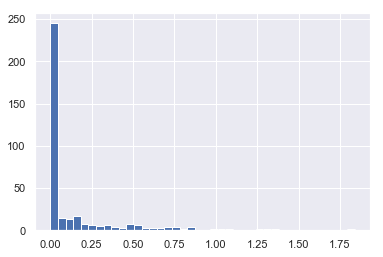

In [3]:
plt.hist(inches, 40);

## Comparison Operators
NumPy also implements comparison operators such as < (less than) and > (greater than) as element-wise ufuncs. The result of these comparison operators is always an array with a Boolean data type. All six of the standard comparison operations are available:

In [4]:
x = np.array([1, 2, 3, 4, 5]) 
x < 3 # less than 

array([ True,  True, False, False, False])

In [5]:
x > 3 # greater than Out[6]: array([False, False, False, True, True], dtype=bool) 

array([False, False, False,  True,  True])

In [6]:
x <= 3 # less than or equal 

array([ True,  True,  True, False, False])

In [7]:
x >= 3 # greater than or equal 

array([False, False,  True,  True,  True])

In [8]:
x != 3 # not equal 

array([ True,  True, False,  True,  True])

In [9]:
x == 3 # equal

array([False, False,  True, False, False])

## Working with Boolean arrays
Given a Boolean array, there are a host of useful operations you can do such as counting the number of True entries in a Boolean array. NumPy's np.count_nonzero is helpful for this task:

In [10]:
rng = np.random.RandomState(0) 
x = rng.randint(10, size=(3, 4))
print(x)

[[5 0 3 3]
 [7 9 3 5]
 [2 4 7 6]]


In [11]:
# how many values in the x array are less than 6?
np.count_nonzero(x<6)

8

In [12]:
# You can also use np.sum to find the same answer
np.sum(x < 6)

8

In [13]:
# Count the number of values less than 6 in each row of the matrix
np.sum(x < 6, axis = 1)

array([4, 2, 2])

In [14]:
# are there any values greater than 8? 
np.any(x > 8)

True

In [15]:
# are there any values less than zero? 
np.any(x < 0)

False

In [16]:
# are all values less than 10? 
np.all(x < 10)

True

In [17]:
# are all values equal to 6? 
np.all(x == 6)

False

In [18]:
# are all values in each row less than 8? 
np.all(x < 8, axis=1)

array([ True, False,  True])

Now let's apply this to our rain data. We might want to know the number of days during which it rained more than half an inch, but less than 1 inch of rain.

In [19]:
# Use logic operators (Note the parentheses)
np.sum((inches > 0.5) & (inches < 1))

In [4]:
np.sum(inches == 0)

215

In [8]:
np.sum((inches > 0) & (inches < .2))

75

# Fancy indexing

In [19]:
import numpy as np 
rand = np.random.RandomState(42)
x = rand.randint(100, size=10) 
print(x)

[51 92 14 71 60 20 82 86 74 74]


Suppose we want to access three different elements. We could do it like this:

In [20]:
[x[3], x[7], x[2]]

[71, 86, 14]

Alternatively, we can pass a single list or array of indices to obtain the same result:

In [21]:
ind = [3, 7, 4] 
x[ind]

array([71, 86, 60])

In [22]:
x = np.arange(10) 
print(x)
i = np.array([2, 1, 8, 4]) 
x[i] = 99 
print(x)

[0 1 2 3 4 5 6 7 8 9]
[ 0 99 99  3 99  5  6  7 99  9]


# Sorting arrays

In [23]:
# You could use a simple selection sort
import numpy as np
def selection_sort(x): 
    for i in range(len(x)): 
        swap = i + np.argmin(x[i:]) 
        (x[i], x[swap]) = (x[swap], x[i])
    return x

In [24]:
x = np.array([2, 1, 4, 3, 5]) 
selection_sort(x)

array([1, 2, 3, 4, 5])

In [25]:
x = np.array([2, 1, 4, 3, 5]) 
np.sort(x)

array([1, 2, 3, 4, 5])